Question 5:

Write a quantum circuit that simulates the tossing of a fair coin and execute it
on a local ”perfect” simulator and on a local ”noisy” simulator. Hint: exploit
the superposition.
• Describe your solution;
• What is the width and the depth of resulting circuit?
• Show the resulting circuit and probability distribution for the ”perfect”
simulator;
• Show the probability distribution for the ”noisy” simulator;

The solution is to simply use a qubit and apply a Hadamard gate, resulting in 50% chance to land in either 0 or 1 after the measurement. The 0 and 1 will represent the different faces of the coin.

The snippet below defines and draws the circuit used.

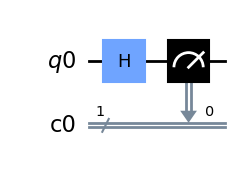

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q_r = QuantumRegister(1)
c_r = ClassicalRegister(1)

circuit = QuantumCircuit(q_r, c_r)
circuit.h(0)
circuit.measure(0, 0)

# visualize, latex is also supported
circuit.draw(output="mpl")

In [2]:
print("Circuit depth (w/ measurement gate): ", circuit.depth())

Circuit depth (w/ measurement gate):  2


The width of the circuit is 1, since we only use 1 qubit. The depth of the circuit is also 1, since there's only one gate applied (Hadamard) before the measurement of a single qubit.

Let's now run the circuit in a local perfect simulator

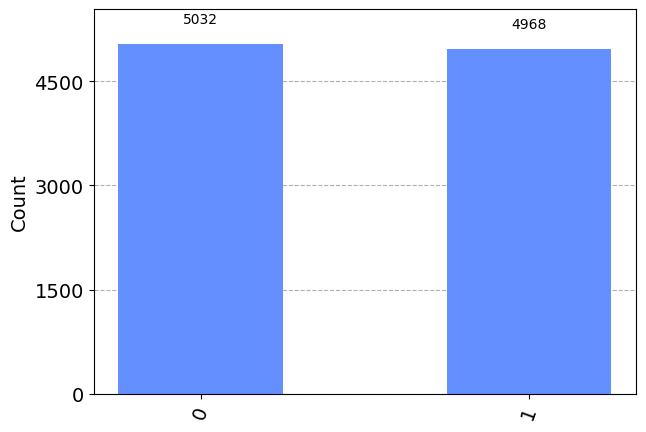

In [3]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('aer_simulator')
job = execute(circuit, simulator, shots=10000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts)

This time, let's try to run it in a local noisy simulator

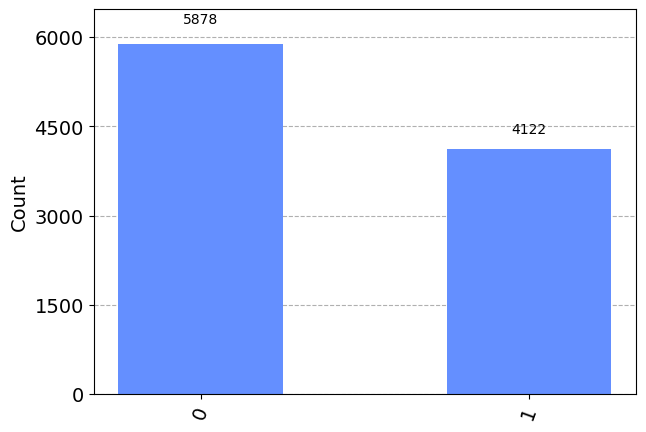

In [4]:
from qiskit.providers.fake_provider import FakeManilaV2

backend = FakeManilaV2()
job = backend.run(circuit, shots=10000)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts)

As we can see, the probability distribution for the noisy simulator looks very different from the perfect one. In a real (and noisy) quantum machine, the coin flip isn't as perfect as one wished.